# Homework 6

In [1]:
def ScrambleImage(mgdata):
    sdata = mgdata + 0
    np.random.shuffle(sdata)
    dists = np.sqrt(((mgdata[0]-sdata).sum(1)))
    seedrow = (dists==0).nonzero()[0]
    return sdata, seedrow

def Project(data):
    """data in rows returns matrix: projected data in rows"""
    cv = np.cov(data.transpose())
    evl, evc = np.linalg.eig(cv)
    ndata = np.dot(data, evc)
    return ndata

def Unscramble(sdata, seedrow, ndata):
    V,H = sdata.shape
    udata = np.zeros((V,H))
    udata[0] = sdata[seedrow] + 0
    unused = list(range(V))
    unused.remove(seedrow)
    nndata = ndata + 0
    k = seedrow
    for i in range( 1, V ):
        dist = np.sqrt(((nndata[k]-nndata[unused])**2).sum(1))
        ag = dist.argsort()
        k = unused[ag[0]]
        udata[i] = sdata[k]
        unused.remove( k )
    return udata

<br><br>
1.  Compute the covariance matrix of:
    $\mathbf{X}=\left[\begin{array}{ccc}4.0 & 2.0 & 0.60 \\ 4.2 & 2.1 & 0.59 \\ 3.9 & 2.0 & 0.58 \\ 4.3 & 2.1 & 0.62 \\ 4.1 & 2.2 & 0.63\end{array}\right]$

In [2]:
import pandas as pd
X = [[4.0, 2.0, 0.60], [4.2, 2.1, 0.59], [3.9, 2.0, 0.58], [4.3, 2.1, 0.62], [4.1, 2.2, 0.63]]
X = pd.DataFrame(X)
print(X)
print(X.cov())

     0    1     2
0  4.0  2.0  0.60
1  4.2  2.1  0.59
2  3.9  2.0  0.58
3  4.3  2.1  0.62
4  4.1  2.2  0.63
         0        1        2
0  0.02500  0.00750  0.00175
1  0.00750  0.00700  0.00135
2  0.00175  0.00135  0.00043


<br><br>

2.  Using the PCA Tree Example above, calculate and display component one, first three, and first 10 dimensions of the image.  Discuss the differences.

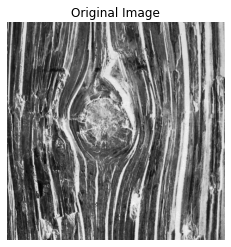

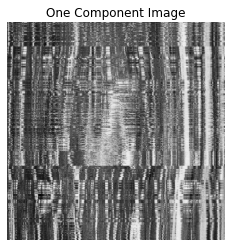

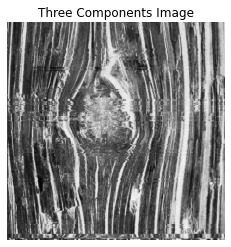

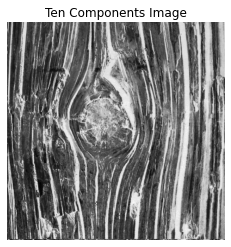

In [3]:
#  PCA Tree Example
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np
import warnings
from PIL import Image 
from urllib.request import urlopen

warnings.filterwarnings("ignore", category=RuntimeWarning)

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/D72.png'
amg = imageio.imread(url, as_gray=True)

plt.title('Original Image')
plt.axis('off')
plt.imshow(amg, cmap='gray')
plt.show()

cv = np.cov(amg.transpose())
evl, evc = np.linalg.eig(cv)
ndata = np.dot(amg, evc[:,:2])

sdata, seedrow = ScrambleImage(amg)
ndata = Project(sdata)

udata = Unscramble(sdata, seedrow, ndata[:,:1])

plt.title('One Component Image')
plt.axis('off')
plt.imshow(udata, cmap='gray')
plt.show()

udata = Unscramble(sdata, seedrow, ndata[:,:3])

plt.title('Three Components Image')
plt.axis('off')
plt.imshow(udata, cmap='gray')
plt.show()

udata = Unscramble(sdata, seedrow, ndata[:,:10])

plt.title('Ten Components Image')
plt.axis('off')
plt.imshow(udata, cmap='gray')
plt.show()

<br><br>

3. Using the Eigen Face example, set the min_faces_per_person=55

In [4]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=55)
print('\nFaces shape:', faces.images.shape)


Faces shape: (1403, 62, 47)


<br><br>
    
3.  List the names of the faces used.

In [5]:
print('\nFaces to be used:\n', faces.target_names)


Faces to be used:
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jean Chretien' 'Junichiro Koizumi'
 'Tony Blair']


<br><br>

4.  Show the subplots for each face of the first 3 principle components using 100 dimensions.

In [6]:
from sklearn.decomposition import PCA as RandomizedPCA

pca = RandomizedPCA(3)
pca.fit(faces.data)

# Compute the components and projected faces
pca = RandomizedPCA(100).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

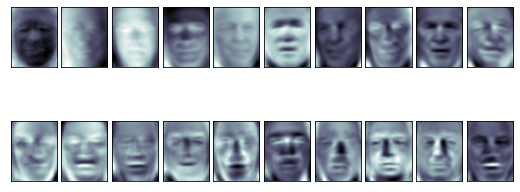

In [11]:
fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

<br><br>

5.  Show the final plot of the faces for the first 100 dimensions.

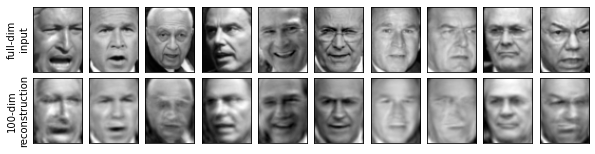

In [9]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');